---
# Documentation: https://wowchemy.com/docs/managing-content/

title: "Trade in Value Added: posisi Indonesia di Global Value Chain"
subtitle: ""
summary: ""
authors: [admin]
tags: [perdagangan, ekonomi, GVC, python]
categories: [perdagangan, ekonomi, GVC, python]
date: 2021-12-13T09:54:16+11:00
lastmod: 2021-12-13T09:54:16+11:00
featured: false
draft: false

# Featured image
# To use, add an image named `featured.jpg/png` to your page's folder.
# Focal points: Smart, Center, TopLeft, Top, TopRight, Left, Right, BottomLeft, Bottom, BottomRight.
image:
  caption: "https://unsplash.com/photos/CpsTAUPoScw?utm_source=unsplash&utm_medium=referral&utm_content=creditShareLink"
  focal_point: ""
  preview_only: false

# Projects (optional).
#   Associate this post with one or more of your projects.
#   Simply enter your project's folder or file name without extension.
#   E.g. `projects = ["internal-project"]` references `content/project/deep-learning/index.md`.
#   Otherwise, set `projects = []`.
projects: []
---


Global Value Chain (GVC) adalah jargon yang kerap kali meramaikan jagat akademisi maupun konsultan ketika kita bicara soal perdagangan internasional dan pertumbuhan industri manufaktur. Kalau diharfiahkan dalam bahasa Indonesia, GVC jadi Rantai Pasok Global (RPG). Tapi ya aneh rasanya pakai singkatan RPG karena bagi saya RPG memiliki arti lain wkwk. jadi kita pakai GVC aja yaa.

GVC itu intinya adalah membagi rantai produksi suatu barang jadi menjadi beberapa rantai nilai, yang masing-masing mata rantainya diproduksi di negara-negara yang berbeda. Contohnya adalah sepeda, di mana untuk jadi 1 sepeda, sebuah pembuat sepeda membeli komponen dari berbagai negara.

![wdr2020](tiva/pic1.jpg "diambil dari World Development Report 2020, World Bank.")

Gambar di atas didapatkan dari [World Development Report 2020](https://www.worldbank.org/en/publication/wdr2020), sebuah bacaan yang saya rasa cukup lengkap tentang GVC. Saya pernah mencontohkan (secara sangat sederhana) dalam salah satu postingan saya tentang bagaimana GVC membantu membuat [bumbu gado-gado]({{< relref "/post/gado2" >}}) yang berhasil menembus pasar ekspor. Saya juga pernah menulis artikel [pendek](https://www.eastasiaforum.org/2020/06/16/indonesias-ppe-export-ban-backfires/) tentang peran GVC dalam COVID-19. Versi panjangnya [di sini](https://www.researchgate.net/publication/346643698_A_REVIEW_ON_INDONESIAN_TRADE_POLICY_IN_RESPONSE_TO_COVID-19).

GVC sendiri sering disebut-sebut oleh orang-orang pemerintahan, di mana keterlibatan Indonesia di dalam GVC dianggap mampu mendorong pertumbuhan sektor industri manufaktur Indonesia. GVC sendiri merupakan salah satu andalan negara-negara di regional ASEAN dan Asia Timur dalam membuat produk manufaktur yang kompetitif. Indonesia sering disebut-sebut kurang memanfaatkan GVC dibandingkan negara-negara lain di kawasan. Benarkah?

Salah satu indikator yang dapat digunakan untuk melihat keterlibatan Indonesia di dalam GVC adalah dengan melihat [Trade in Value Added (TiVA)](https://www.oecd.org/sti/ind/measuring-trade-in-value-added.htm). TiVA adalah sebuah indikator yang mengandalkan data perdagangan barang, yang mencoba mengestimasi berapa besar kandungan lokal dan kandungan impor di dalam barang jadi yang diproduksi di suatu negara. Sebuah negara yang mengandalkan GVC akan memiliki kandungan impor yang tinggi di dalam nilai ekspornya. Dengan kata lain, misalnya kita pakai contoh sepeda, maka TiVA akan menunjukkan seberapa besar total impor dari gigi, rantai, ban, dan lain sebagainya, dibandingkan dengan nilai ekspor sepedanya. Data TiVA yang digunakan di postingan ini diambil [dari sini](https://stats.oecd.org/Index.aspx?DataSetCode=TIVA_2021_C1). Seperti biasa, saya akan pakai Python. Data ini bisa coba direplikasi oleh pembaca dengan kode ini.

In [6]:
tiva=pd.read_excel('tiva.xlsx',sheet_name='pake') 
# sumber: https://stats.oecd.org/Index.aspx?DataSetCode=TIVA_2021_C1
tiva=pd.melt(tiva, id_vars=['year'])
tiva2=pd.read_excel('tiva.xlsx',sheet_name='pake2')
# sumber: https://stats.oecd.org/Index.aspx?DataSetCode=TIVA_2021_C1
tiva2=pd.melt(tiva2, id_vars=['year'])

In [3]:
tiva.variable.unique() # ngecek negara

array(['OECD', 'AUS', 'AUT', 'BEL', 'CAN', 'CHL', 'COL', 'CRI', 'CZE',
       'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL',
       'ISR', 'ITA', 'JPN', 'KOR', 'LVA', 'LTU', 'LUX', 'MEX', 'NLD',
       'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'SVN', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'NON', 'ARG', 'BRA', 'BRN', 'BGR', 'KHM',
       'CHN', 'HRV', 'CYP', 'IND', 'IDN', 'HKG', 'KAZ', 'LAO', 'MYS',
       'MLT', 'MAR', 'MMR', 'PER', 'PHL', 'ROU', 'RUS', 'SAU', 'SGP',
       'ZAF', 'TWN', 'THA', 'TUN', 'VNM', 'ROW', 'APEC', 'ASEAN', 'EASIA',
       'EU27', 'EU28', 'EU15', 'EU13', 'EA19', 'G20', 'ZEUR', 'ZASI',
       'ZNAM', 'ZSCA', 'ZOTH'], dtype=object)

grafik di bawah ini menunjukkan berapa persen kandungan internasional di dalam ekspor negara-negara yang saya pilih. Dengan kata lain, sumbu y menunjukkan $\frac{\text{kandungan internasional}}{\text{total ekspor}}$ secara agregat. Jadi kita hitung tidak hanya sepeda, tapi seluruh ekspor Indonesia. Untuk kandungan internasional, kita juga tidak hitung gear, ban, dll saja, tapi juga seluruh impor barang setengah jadi seperti chip, dll. Ukuran ini tidak mencerminkan industri per industri, tetapi keseluruhan.

Text(0, 0.5, '%')

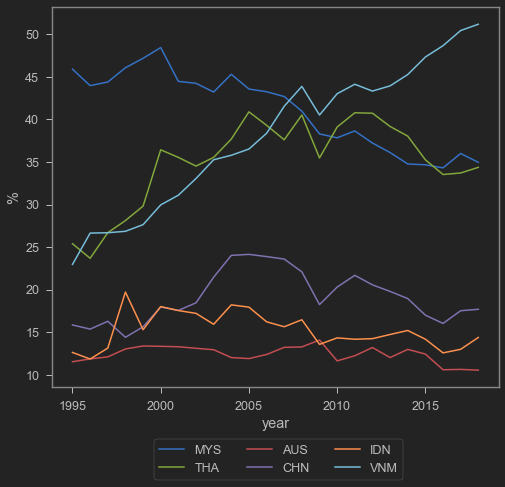

In [7]:
b=[]
ctr=('MYS','THA','AUS','CHN','IDN','VNM')
for i in ctr:
    ttt=tiva.loc[(tiva['variable'] == i)]
    b.append(ttt)
b=pd.concat(b)
sns.lineplot(data=b,x='year',y='value',hue='variable')
plt.legend(title="",bbox_to_anchor=(0.8,-.12),ncol=3)
plt.ylabel("%")

Seperti dapat kita lihat di atas, Indonesia (IDN) memiliki kandungan impor yang sangat kecil terhadap total ekspornya, apalagi jika dibandingkan negara-negara ASEAN lain. Sebenarnya hal ini lumayan wajar, mengingat ekspor Indonesia didominasi barang mentah. Barang mentah kan ga ada input apa-apa, jadinya ga butuh barang setengah jadi dari negara lain untuk membuatnya toh. Dengan indikator ini, partisipasi Indonesia bahkan lebih tinggi daripada Australia yang bisa dibilang tidak punya industri manufaktur apapun.

Tapi mungkin yang paling wow adalah Vietnam. Naik terus kandungan internasionalnya. wkwk.

Gambar di bawah ini menunjukkan total impor bahan baku dan barang setengah jadi dari masing-masing negara. Datanya juga didapatkan dari TiVA database. Kalau pakai metrik ini, RRT jauh di atas yang lain. Akan tetapi, Indonesia masih yang paling rendah. Padahal dibandingkan ukuran ekonomi tetangganya, Indonesia relatif lebih besar. Lagi-lagi, lihat Vietnam.

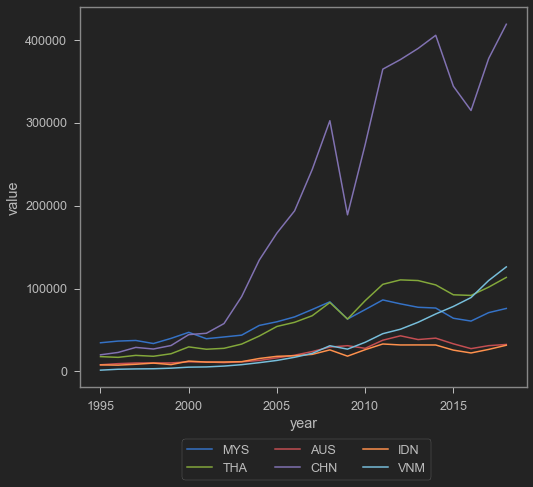

In [8]:
b2=[]
for i in ctr:
    t2=tiva2.loc[(tiva2['variable'] == i)]
    b2.append(t2)
b2=pd.concat(b2)
sns.lineplot(data=b2,x='year',y='value',hue='variable')
plt.legend(title="",bbox_to_anchor=(0.8,-.12),ncol=3)

Vietnam ini ekonominya kecil banget. Pada tahun 2019, PDB Vietnam cuma 261,9 billion USD (2019), atau gak sampe seperempatnya jika dibandingkan dengan Indonesia di angka 1,119 trillion USD pada tahun yang sama. Kok bisa ekonomi sekecil itu mengimpor bahan baku dan barang setengah jadi sebanyak grafik di atas, dan terus tumbuh? Siapa yang mengonsumsi barang jadinya? Kalau Indonesia wajar lah ya, populasinya kan banyak. Marketnya gede. Wajar aja kalau impornya dalam USD tergolong besar. Lah Vietnam? Buat apa impor banyak-banyak?

Jawabannya: buat diekspor. Coba kita lihat ekspor barang-barang berkategori teknologi tinggi di bawah ini. Kalau ini datanya dapat dari [World Bank](https://data.worldbank.org/indicator/TX.VAL.TECH.CD?locations=VN-ID).

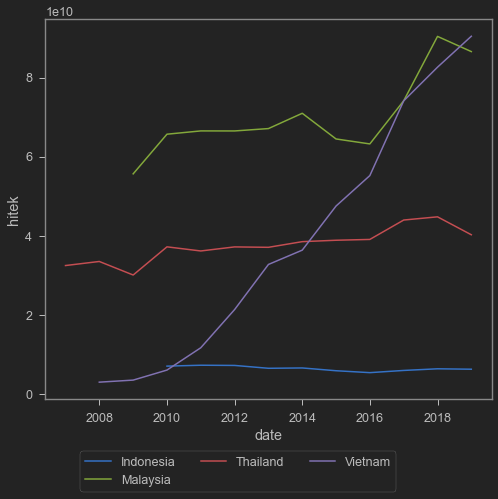

In [16]:
import wbdata as wb
import datetime
tanggal=(datetime.datetime(1995,1,1), datetime.datetime(2019,1,1))
a=wb.get_dataframe({"TX.VAL.TECH.CD" : "hitek"}, country=["IDN","VNM","THA","MYS"],
                   data_date=tanggal, convert_date=True, keep_levels=True)
a=a.reset_index()
sns.lineplot(data=a,x='date',y='hitek',hue='country')
plt.legend(title="",bbox_to_anchor=(0.8,-.12),ncol=4)
plt.ylabel("USD")
plt.xlabel("year")

Kelihatan ya pertumbuhan ekspor barang berteknologi tinggi-nya. Vietnam bukanlah negara yang punya tradisi riset yang tinggi jika dibandingkan dengan negara-negara tetangganya di kawasan. Mereka ga riset sendiri. Mereka sekadar merakit aja. Dengan mengimpor bahan baku dan barang setengah jadi seperti chip, mereka bisa jadi produsen barang-barang berteknologi tinggi. BTW Saya ga include RRT di grafik di atas karena kalau ada China, yang lain jadi kecil banget wkwkw.

Grafik di bawah ini menunjukkan publikasi artikel ilmiah, juga dapat datanya dari World Bank. Ini sebagai ilustrasi kekuatan riset masing-masing negara. Coba bandingkan Vietnam dengan yang lain.

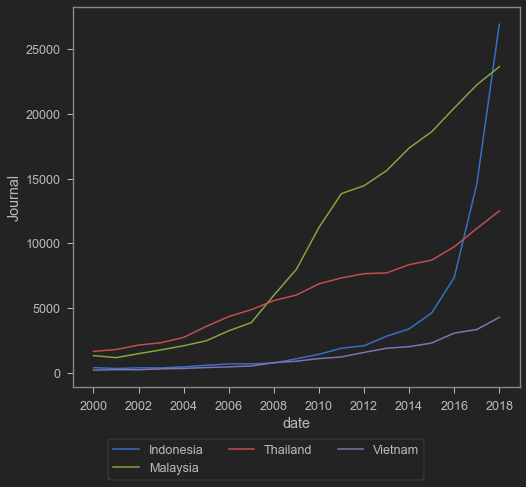

In [17]:
import wbdata as wb
import datetime
tanggal=(datetime.datetime(1995,1,1), datetime.datetime(2019,1,1))
a=wb.get_dataframe({"IP.JRN.ARTC.SC" : "Journal"}, country=["IDN","VNM","THA","MYS"],
                   data_date=tanggal, convert_date=True, keep_levels=True)
a=a.reset_index()
sns.lineplot(data=a,x='date',y='Journal',hue='country')
plt.legend(title="",bbox_to_anchor=(0.8,-.12),ncol=3)

BTW kalau soal riset, Indonesia tiba-tiba naik pesat ya pada 2016 ke atas. Wah keren ya! Kok bisa sih? Apa resepnya?

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Who published in &quot;predatory&quot; journals (2015-2017)?<br>Source: <a href="https://t.co/j5TQBWgrbr">https://t.co/j5TQBWgrbr</a> <a href="https://t.co/PLYXDx9QYX">pic.twitter.com/PLYXDx9QYX</a></p>&mdash; Arief Anshory Yusuf (@anshory72) <a href="https://twitter.com/anshory72/status/1358605111174463488?ref_src=twsrc%5Etfw">February 8, 2021</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

Apa kesimpulannya? Saya serahkan ke para pembaca wkkww. Sekian postingan hari ini. semoga berguna buat anda! Mensyen saya di [twitter](https://twitter.com/iMedKrisna) untuk kritik, saran ataupun diskusi yaa. Thanks!